# **`Notebook Information`**
- **Name:** Mhar Andrei Consebido Macapallag
- **Y&S:** BSCS 3B IS
- **Course:** CSST 101 | Advanced Representation and Reasoning
- **Topic:** Module 2.0: Probabilistic Reasoning in AI
- **Due date:** N/A

# **`Laboratory Exercise #4: Bayesian Networks`**

In [1]:
#@title # **`Exercise 1: Setting Up the Environment`**

#@markdown ### 1. Install the Required Library
#@markdown We need the `pgmpy` library for working with probabilistic graphical models, specifically Bayesian Networks.
#@markdown This cell installs the `pgmpy` package and checks whether the installation was successful.

#@markdown ```
#@markdown !pip install pgmpy
#@markdown ```

!pip install pgmpy

#@markdown After installation, we verify if `pgmpy` is correctly installed by checking the list of installed packages.

#@markdown ```python
#@markdown import pkg_resources
#@markdown installed_packages = pkg_resources.working_set
#@markdown package_names = [i.key for i in installed_packages]
#@markdown if 'pgmpy' in package_names:
#@markdown     print("pgmpy installed successfully!")
#@markdown else:
#@markdown     print("Error: pgmpy not installed. Please try again.")
#@markdown ```

#@markdown ### 2. Import Libraries
#@markdown In this cell, we import essential libraries for working with Bayesian Networks. These include:
#@markdown - `numpy` for numerical computations,
#@markdown - `pandas` for data handling,
#@markdown - `pgmpy` for Bayesian networks,
#@markdown - `networkx` for visualizing graphs,
#@markdown - `matplotlib` for plotting.

#@markdown ```python
#@markdown import numpy as np
#@markdown import pandas as pd
#@markdown from pgmpy.models import BayesianNetwork
#@markdown from pgmpy.factors.discrete import TabularCPD
#@markdown from pgmpy.inference import VariableElimination
#@markdown from pgmpy.estimators import MaximumLikelihoodEstimator
#@markdown import networkx as nx
#@markdown import matplotlib.pyplot as plt
#@markdown ```

import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output
clear_output()

import pkg_resources
installed_packages = pkg_resources.working_set
package_names = [i.key for i in installed_packages]
if 'pgmpy' in package_names:
    print("pgmpy installed successfully!")
else:
    print("Error: pgmpy not installed. Please try again.")

print("Libraries imported successfully!")


pgmpy installed successfully!
Libraries imported successfully!


In [2]:
#@title # **`Exercise 2: Building a Simple Bayesian Network`**

#@markdown ### 1. Define the Structure
#@markdown In this cell, we define the structure of a simple Bayesian Network with three variables:
#@markdown - `Weather` affects `Traffic`,
#@markdown - `Traffic` affects whether you are `Late`.
#@markdown This structure represents the causal relationships between these variables.

#@markdown ```python
#@markdown # Create a Bayesian Network
#@markdown model = BayesianNetwork([('Weather', 'Traffic'), ('Traffic', 'Late')])
#@markdown
#@markdown print("Bayesian Network structure defined!")
#@markdown ```

# Create a Bayesian Network
model = BayesianNetwork([('Weather', 'Traffic'), ('Traffic', 'Late')])

print("Bayesian Network structure defined!")

#@markdown ### 2. Define Conditional Probability Tables (CPTs)
#@markdown In this step, we define the Conditional Probability Distributions (CPDs) for the variables in the network.
#@markdown - `Weather` can be either 'Sunny' or 'Rainy'.
#@markdown - `Traffic` can be 'Light' or 'Heavy' based on the weather.
#@markdown - `Late` depends on traffic, with 'On Time' or 'Late' as possible outcomes.

#@markdown ```python
#@markdown # CPD for Weather
#@markdown cpd_weather = TabularCPD(variable='Weather', variable_card=2,
#@markdown                          values=[[0.6], [0.4]],
#@markdown                          state_names={'Weather': ['Sunny', 'Rainy']})
#@markdown
#@markdown # CPD for Traffic
#@markdown cpd_traffic = TabularCPD(variable='Traffic', variable_card=2,
#@markdown                          values=[[0.8, 0.3],
#@markdown                                  [0.2, 0.7]],
#@markdown                          evidence=['Weather'],
#@markdown                          evidence_card=[2],
#@markdown                          state_names={'Traffic': ['Light', 'Heavy'],
#@markdown                                       'Weather': ['Sunny', 'Rainy']})
#@markdown
#@markdown # CPD for Late
#@markdown cpd_late = TabularCPD(variable='Late', variable_card=2,
#@markdown                       values=[[0.9, 0.6],
#@markdown                               [0.1, 0.4]],
#@markdown                       evidence=['Traffic'],
#@markdown                       evidence_card=[2],
#@markdown                       state_names={'Late': ['On Time', 'Late'],
#@markdown                                    'Traffic': ['Light', 'Heavy']})
#@markdown
#@markdown # Add CPDs to the model
#@markdown model.add_cpds(cpd_weather, cpd_traffic, cpd_late)
#@markdown
#@markdown # Check if the model is valid
#@markdown if model.check_model():
#@markdown     print("Model is valid!")
#@markdown else:
#@markdown     print("Error: Model is not valid. Please check your CPDs.")
#@markdown ```

# CPD for Weather
cpd_weather = TabularCPD(variable='Weather', variable_card=2,
                         values=[[0.6], [0.4]],
                         state_names={'Weather': ['Sunny', 'Rainy']})

# CPD for Traffic
cpd_traffic = TabularCPD(variable='Traffic', variable_card=2,
                         values=[[0.8, 0.3],
                                 [0.2, 0.7]],
                         evidence=['Weather'],
                         evidence_card=[2],
                         state_names={'Traffic': ['Light', 'Heavy'],
                                      'Weather': ['Sunny', 'Rainy']})

# CPD for Late
cpd_late = TabularCPD(variable='Late', variable_card=2,
                      values=[[0.9, 0.6],
                              [0.1, 0.4]],
                      evidence=['Traffic'],
                      evidence_card=[2],
                      state_names={'Late': ['On Time', 'Late'],
                                   'Traffic': ['Light', 'Heavy']})

# Add CPDs to the model
model.add_cpds(cpd_weather, cpd_traffic, cpd_late)

# Check if the model is valid
if model.check_model():
    print("Model is valid!")
else:
    print("Error: Model is not valid. Please check your CPDs.")

Bayesian Network structure defined!
Model is valid!


In [3]:
#@title # **`Exercise 3: Querying the Bayesian Network`**

#@markdown ### 1. Perform Exact Inference
#@markdown In this cell, we use `VariableElimination`, a method from `pgmpy`, to perform inference on the Bayesian Network.
#@markdown We query the network to compute the probability of being `Late` given that the `Weather` is 'Rainy'.

#@markdown ```python
#@markdown # Initialize inference engine
#@markdown inference = VariableElimination(model)
#@markdown
#@markdown # Query: Probability of being Late given that it is Rainy
#@markdown query_result = inference.query(variables=['Late'], evidence={'Weather': 'Rainy'})
#@markdown
#@markdown print("Query Result:")
#@markdown print(query_result)
#@markdown ```

# Initialize inference engine
inference = VariableElimination(model)

# Query: Probability of being Late given that it is Rainy
query_result = inference.query(variables=['Late'], evidence={'Weather': 'Rainy'})

print("Query Result:")
print(query_result)

#@markdown ### Interpretation of results:
#@markdown The query result shows the probability distribution for being 'On Time' or 'Late' given that the weather is 'Rainy'.
#@markdown - $P(\text{On Time | Rainy}) ≈ {:.2f}$
#@markdown - $P(\text{Late | Rainy}) ≈ {:.2f}$

#@markdown ```python
#@markdown interpretation = """
#@markdown The query result shows the probability distribution for being 'On Time' or 'Late' given that the weather is 'Rainy'.
#@markdown - P(On Time | Rainy) ≈ {:.2f}
#@markdown - P(Late | Rainy) ≈ {:.2f}
#@markdown
#@markdown This means that when it's raining, there's a higher chance of being late compared to being on time.
#@markdown """.format(query_result.values[0], query_result.values[1])
#@markdown
#@markdown print(interpretation)
#@markdown
#@markdown ```

interpretation = """
The query result shows the probability distribution for being 'On Time' or 'Late' given that the weather is 'Rainy'.
- P(On Time | Rainy) ≈ {:.2f}
- P(Late | Rainy) ≈ {:.2f}

This means that when it's raining, there's a higher chance of being late compared to being on time.
""".format(query_result.values[0], query_result.values[1])

print(interpretation)


Query Result:
+---------------+-------------+
| Late          |   phi(Late) |
+===============+=============+
| Late(On Time) |      0.6900 |
+---------------+-------------+
| Late(Late)    |      0.3100 |
+---------------+-------------+

The query result shows the probability distribution for being 'On Time' or 'Late' given that the weather is 'Rainy'.
- P(On Time | Rainy) ≈ 0.69
- P(Late | Rainy) ≈ 0.31

This means that when it's raining, there's a higher chance of being late compared to being on time.



In [4]:
#@title # **`Exercise 4: Parameter Learning`**

#@markdown ### 1. Simulate a Dataset
#@markdown Here, we simulate a dataset with 1000 samples based on our Bayesian Network.
#@markdown - Weather is randomly generated as 'Sunny' or 'Rainy'.
#@markdown - Traffic is dependent on the weather, and Late depends on traffic.
#@markdown The resulting dataset is displayed and summarized.

#@markdown Set the number of samples:
n_samples = 1000 #@param {type:"integer"}

#@markdown ```python
#@markdown np.random.seed(42)
#@markdown
#@markdown def generate_sample():
#@markdown     weather = np.random.choice(['Sunny', 'Rainy'], p=[0.6, 0.4])
#@markdown     traffic = np.random.choice(['Light', 'Heavy'],
#@markdown                                p=[0.8, 0.2] if weather == 'Sunny' else [0.3, 0.7])
#@markdown     late = np.random.choice(['On Time', 'Late'],
#@markdown                             p=[0.9, 0.1] if traffic == 'Light' else [0.6, 0.4])
#@markdown     return [weather, traffic, late]
#@markdown
#@markdown data = pd.DataFrame([generate_sample() for _ in range(n_samples)],
#@markdown                     columns=['Weather', 'Traffic', 'Late'])
#@markdown
#@markdown print("Dataset Preview:")
#@markdown print(data.head())
#@markdown
#@markdown print("\nDataset Summary:")
#@markdown print(data.describe(include='all'))
#@markdown ```

np.random.seed(42)

def generate_sample():
    weather = np.random.choice(['Sunny', 'Rainy'], p=[0.6, 0.4])
    traffic = np.random.choice(['Light', 'Heavy'],
                               p=[0.8, 0.2] if weather == 'Sunny' else [0.3, 0.7])
    late = np.random.choice(['On Time', 'Late'],
                            p=[0.9, 0.1] if traffic == 'Light' else [0.6, 0.4])
    return [weather, traffic, late]

data = pd.DataFrame([generate_sample() for _ in range(n_samples)],
                    columns=['Weather', 'Traffic', 'Late'])

print("Dataset Preview:")
print(data.head())

print("\nDataset Summary:")
print(data.describe(include='all'))

#@markdown ### 2. Estimate the Parameters
#@markdown Using Maximum Likelihood Estimation (MLE), we estimate the parameters of the Bayesian Network from the simulated data.

#@markdown ```python
#@markdown # Estimate CPDs using Maximum Likelihood Estimation
#@markdown mle = MaximumLikelihoodEstimator(model, data)
#@markdown
#@markdown # Estimate CPD for Traffic
#@markdown cpd_traffic_mle = mle.estimate_cpd('Traffic')
#@markdown print("Estimated CPD for Traffic:")
#@markdown print(cpd_traffic_mle)
#@markdown
#@markdown # Estimate CPD for Late
#@markdown cpd_late_mle = mle.estimate_cpd('Late')
#@markdown print("\nEstimated CPD for Late:")
#@markdown print(cpd_late_mle)
#@markdown ```

# Estimate CPDs using Maximum Likelihood Estimation
mle = MaximumLikelihoodEstimator(model, data)

# Estimate CPD for Traffic
cpd_traffic_mle = mle.estimate_cpd('Traffic')
print("Estimated CPD for Traffic:")
print(cpd_traffic_mle)

# Estimate CPD for Late
cpd_late_mle = mle.estimate_cpd('Late')
print("\nEstimated CPD for Late:")
print(cpd_late_mle)

#@markdown ### Compare estimated vs. original parameters:
#@markdown We compare the original CPDs with the estimated ones and calculate the mean absolute error between them.

#@markdown ```python
#@markdown def compare_cpds(original, estimated, variable):
#@markdown     print(f"Comparison for {variable}:")
#@markdown     print("Original:")
#@markdown     print(original.values)
#@markdown     print("Estimated:")
#@markdown     print(estimated.values)
#@markdown     print(f"Mean Absolute Error: {np.mean(np.abs(original.values - estimated.values)):.4f}")
#@markdown     print()
#@markdown
#@markdown compare_cpds(cpd_traffic, cpd_traffic_mle, 'Traffic')
#@markdown compare_cpds(cpd_late, cpd_late_mle, 'Late')
#@markdown ```

def compare_cpds(original, estimated, variable):
    print(f"Comparison for {variable}:")
    print("Original:")
    print(original.values)
    print("Estimated:")
    print(estimated.values)
    print(f"Mean Absolute Error: {np.mean(np.abs(original.values - estimated.values)):.4f}")
    print()

compare_cpds(cpd_traffic, cpd_traffic_mle, 'Traffic')
compare_cpds(cpd_late, cpd_late_mle, 'Late')


Dataset Preview:
  Weather Traffic     Late
0   Sunny   Heavy     Late
1   Sunny   Light  On Time
2   Sunny   Heavy     Late
3   Rainy   Light     Late
4   Rainy   Light  On Time

Dataset Summary:
       Weather Traffic     Late
count     1000    1000     1000
unique       2       2        2
top      Sunny   Light  On Time
freq       575     579      772
Estimated CPD for Traffic:
+----------------+---------------------+---------------------+
| Weather        | Weather(Rainy)      | Weather(Sunny)      |
+----------------+---------------------+---------------------+
| Traffic(Heavy) | 0.7058823529411765  | 0.21043478260869566 |
+----------------+---------------------+---------------------+
| Traffic(Light) | 0.29411764705882354 | 0.7895652173913044  |
+----------------+---------------------+---------------------+

Estimated CPD for Late:
+---------------+---------------------+---------------------+
| Traffic       | Traffic(Heavy)      | Traffic(Light)      |
+---------------+---------

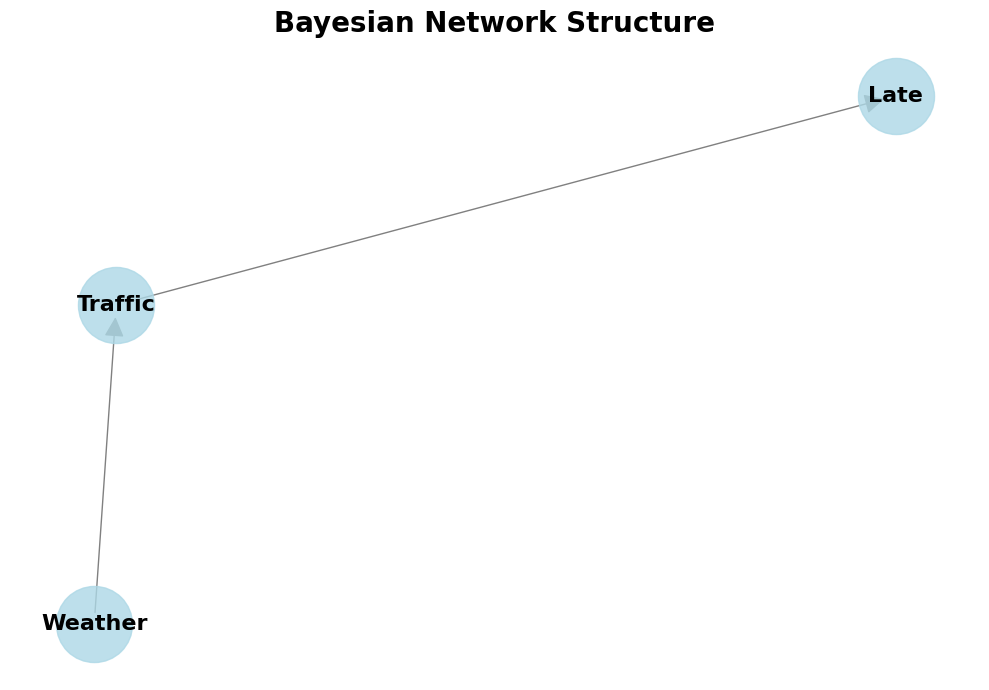

In [5]:
#@title # **`Exercise 5: Visualizing the Bayesian Network`**

#@markdown ### 1. Visualize the Network Structure
#@markdown In this cell, we visualize the structure of the Bayesian Network using the `networkx` library.
#@markdown The directed edges between variables (Weather → Traffic → Late) represent the dependencies in the model.

#@markdown ```python
#@markdown def visualize_bn(model):
#@markdown     # Create a directed graph
#@markdown     G = nx.DiGraph()
#@markdown     G.add_edges_from(model.edges())
#@markdown
#@markdown     # Set up the plot
#@markdown     plt.figure(figsize=(10, 7))
#@markdown     pos = nx.spring_layout(G)
#@markdown
#@markdown     # Draw nodes
#@markdown     nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000, alpha=0.8)
#@markdown     nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')
#@markdown
#@markdown     # Draw edges
#@markdown     nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=30)
#@markdown
#@markdown    # Add a title
#@markdown     plt.title("Bayesian Network Structure", fontsize=20, fontweight='bold')
#@markdown
#@markdown     # Remove axis
#@markdown     plt.axis('off')
#@markdown
#@markdown     # Show the plot
#@markdown     plt.tight_layout()
#@markdown     plt.show()
#@markdown
#@markdown visualize_bn(model)
#@markdown ```

def visualize_bn(model):
    # Create a directed graph
    G = nx.DiGraph()
    G.add_edges_from(model.edges())

    # Set up the plot
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=3000, alpha=0.8)
    nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=30)

    # Add a title
    plt.title("Bayesian Network Structure", fontsize=20, fontweight='bold')

    # Remove axis
    plt.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

visualize_bn(model)

#@markdown ### Interpretation:
#@markdown The plot shows the structure of our Bayesian Network. Weather influences Traffic, and Traffic influences whether we are Late or On Time.
